### ICDAR 2017 _ Only Korean, Latin _ EDA

In [35]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

In [3]:
image_dir = '/opt/ml/input/data/ICDAR17_All/images/'
ann_dir = '/opt/ml/input/data/ICDAR17_All/ufo/'

with open(ann_dir+'train.json', 'r') as f:
    data = json.load(f)['images']

pd_data = pd.DataFrame(data).T
ann_data = pd.concat({k : pd.DataFrame(v) for k, v in pd_data['words'].items()}, axis=1).T
real_data = ann_data[ann_data['transcription'] != '###\n']
real_data['transcription'] = real_data['transcription'].apply(lambda x : x.strip())

/tmp/ipykernel_2778/2346072512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data['transcription'] = real_data['transcription'].apply(lambda x : x.strip())


In [25]:
def get_image_size(img_path):
    img = Image.open(img_path)
    return img.size[0], img.size[1]

for name, tpl in pd_data.iterrows():
    pd_data.at[name, 'img_w'], pd_data.at[name, 'img_h'] = get_image_size(image_dir + name)
    pd_data.at[name, 'num_ann'] = len(tpl['words'])

pd_data

,words,img_w,img_h,num_ann
img_802.jpg,"{'0': {'points': [[131, 79], [461, 77], [464, ...",641,481,5
img_805.jpg,"{'0': {'points': [[397, 61], [430, 60], [431, ...",640,427,10
img_806.jpg,"{'0': {'points': [[151, 259], [310, 262], [310...",800,600,3
img_807.jpg,"{'0': {'points': [[690, 204], [788, 211], [788...",800,600,3
img_810.jpg,"{'0': {'points': [[91, 158], [177, 122], [180,...",409,381,11
...,...,...,...,...
img_6396.jpg,"{'0': {'points': [[2066, 1423], [2062, 1567], ...",4032,3024,2
img_6399.jpg,"{'0': {'points': [[792, 425], [789, 498], [385...",1280,960,1
img_6910.jpg,"{'0': {'points': [[65, 3], [1343, 4], [1342, 1...",2048,224,2
img_6955.jpg,"{'0': {'points': [[261, 129], [667, 116], [685...",2048,309,3


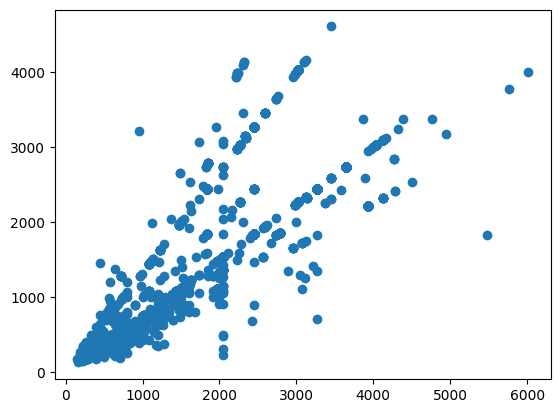

In [29]:
# 이미지 크기 분포
img_w = pd_data['img_w'].to_list()
img_h = pd_data['img_h'].to_list()

plt.scatter(img_w, img_h)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


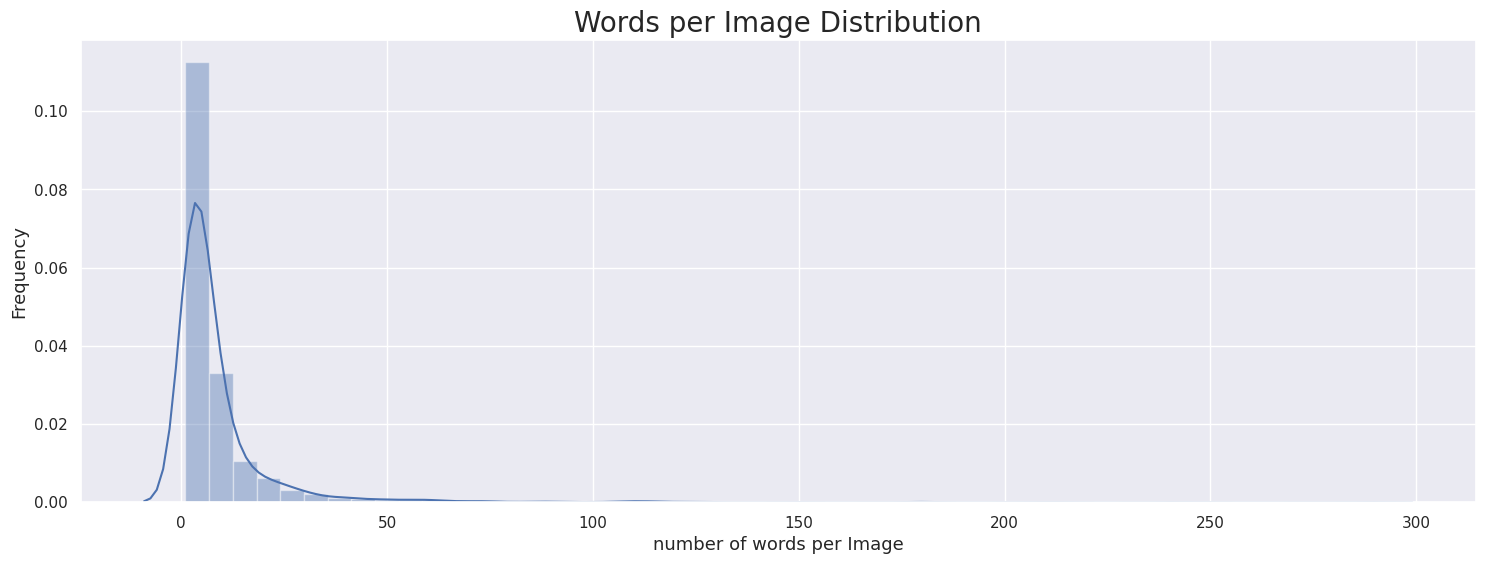

In [37]:
# 이미지 당 annotation 개수 분포

def plot_dist(df, field, bins, color, xlabel, ylabel, title):
    sns.set(color_codes=True)
    fig, ax = plt.subplots(figsize=(18,6))
    sns.distplot(df[field], bins=bins, color=color, ax=ax)
    
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_title(title, fontsize=20)
    plt.show()

plot_dist(df=pd_data, field='num_ann', bins=50, color='b', xlabel='number of words per Image', \
          ylabel='Frequency', title='Words per Image Distribution')

/tmp/ipykernel_2778/1741184598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data['center_x'] = real_data['points'].apply(lambda x : np.array(x)[:, 0].mean())
/tmp/ipykernel_2778/1741184598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data['center_y'] = real_data['points'].apply(lambda x : np.array(x)[:, 1].mean())


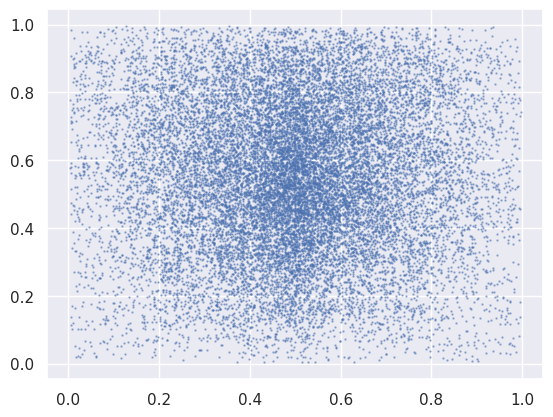

In [64]:
# 이미지 기준 박스의 중심점 분포

real_data['center_x'] = real_data['points'].apply(lambda x : np.array(x)[:, 0].mean())
real_data['center_y'] = real_data['points'].apply(lambda x : np.array(x)[:, 1].mean())

for name, srs in real_data.iterrows():
    real_data.at[name, 'center_x'] /= pd_data.at[name[0], 'img_w']
    real_data.at[name, 'center_y'] /= pd_data.at[name[0], 'img_h']
    
cen_rx = real_data['center_x'].to_list()
cen_ry = real_data['center_y'].to_list()

plt.scatter(cen_rx, cen_ry, s=0.5, alpha=0.5)

In [66]:
# 언어비율
real_data['language'].value_counts()

Latin     18142
Korean     2390
Name: language, dtype: int64